## Import needed libraries
if you don't have these libraries please run requirements.txt first to install them.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

## Functions

In [141]:
# Make a random 3*3 board
def make_random_board():
    moves = ['X', 'O', ''] # Each sell can be on
    board = [np.random.choice(moves) for _ in range(9)] # Make a random array with length 9
    board = np.array(board)
    board = board.reshape(3, 3) # Reshape the array to 3*3
    return board

In [142]:
# Helper function to check if a player has won
def check_winner(board, player):
    # Check rows, columns, and diagonals for a win
    for i in range(3):
        if np.all(board[i, :] == player) or np.all(board[:, i] == player):
            return True
    if np.all(np.diag(board) == player) or np.all(np.diag(np.fliplr(board)) == player):
        return True
    return False

In [143]:
# Check if a given board is valid
def is_valid_board(board):
    # Flatten the board for easier processing
    flat_board = board.flatten()
    
    # Count the number of X's and O's
    x_count = np.sum(flat_board == 'X')
    o_count = np.sum(flat_board == 'O')
    
    # Rule 1: X's must be equal to or at most one more than O's
    if not (x_count == o_count or x_count == o_count + 1):
        return False
    
    # Check if X or O has won
    x_wins = check_winner(board, 'X')
    o_wins = check_winner(board, 'O')
    
    # Rule 2: Both players cannot win simultaneously
    if x_wins and o_wins:
        return False
    
    # Rule 3: If X wins, there must be one more X than O
    if x_wins and x_count != o_count + 1:
        return False
    
    # Rule 4: If O wins, X and O counts must be equal
    if o_wins and x_count != o_count:
        return False
    
    # If all checks pass, the board is valid
    return True

In [144]:
# Use Monte Carlo simulation (5000 round)
def monte_carlo_simulation(n=5000):
    valid_counter = 0 # Define counter for count valid board
    total_5 = 0 
    valid_5 = 0
    for i in range(n):
        board = make_random_board() # Make a random board
        flat_board = board.flatten()
        x_and_o_count = np.sum(flat_board == 'X') + np.sum(flat_board == 'O')
        if x_and_o_count == 5:
            total_5 += 1
        if is_valid_board(board): # If board is valid, valid counter increase 1
            valid_counter += 1
            if x_and_o_count == 5:
                valid_5 += 1
    valid_ratio = valid_counter / n * 100 # Ratio of valid boards
    #valid_5_ratio = valid_5 / total_5 * 100
    return valid_counter, valid_ratio, valid_5,total_5 #valid_5_ratio

In [145]:
# Make all board with 5 moves(3 'X' & 2'O')
def make_all_5_moves():
    all_positions = np.arange(9) # Make an array between 1-9
    boards = [] # Define a list of all boards

    for filled in combinations(all_positions, 5): # All combination (5 ['X' or 'O'] in 9 cells)
        for x_pos in combinations(filled, 3): # All combination (3 'X' at 5 selected cells)
            board = np.full(9, '') # Make an empty board
            board[list(x_pos)] = 'X' # Place 'X's
            board[[i for i in filled if i not in x_pos]] = 'O'# Place 'O's
            boards.append(board.reshape(3, 3)) # Reshape the array to 3*3

    return boards
#print(*make_all_5_moves(), sep='\n')

In [146]:
# Plot lines
def plot_line(ax, data, column):

    # Plot main lines graph
    sns.lineplot(data=data, x=data.index, y=column, ax=ax, color='blue')

    # Calculate «mean» & «standard deviation»
    MEAN = data[column].mean()
    SD = data[column].std()
    # Calculate bounds(MEAN ± SD)
    upper_bound = MEAN + 2 * SD
    lower_bound = MEAN - 2 * SD

    # Plot statics lines
    ax.axhline(MEAN, color='red', linestyle='--') # Plot mean line
    ax.axhline(upper_bound, color='orange', linestyle=':') # Plot upper bound
    ax.axhline(lower_bound, color='orange', linestyle=':') # Plot lower bound
    ax.fill_between(data.index, lower_bound, upper_bound, color='#ADD8E6', alpha=0.2) # Plot Shadow box between bounds

    ax.set_title(f'linear plot for {column}') # Set title for plot

    return ax

In [147]:
def plot_bar(ax, data, column):

    # Plot main bars graph
    sns.barplot(data=data, x=data.index, y=column, ax=ax, color='green')

    # Set start of «y» Range (for better view)
    y_min = data[column].min() # Find min for avoid miss any bars
    y_padding = 0.02 * y_min # calculate pad (2% of minimum of «y»)
    ax.set_ylim(y_min - y_padding, None)  # Set new start range

    ax.set_title(f'Bar Plot for {column}') # Set title for plot
    ax.set_xticks([])  # Disable  «X axis» to avoid clutter

    return ax

In [148]:
def plot_violin(ax, data, column):

    # plot main violin graph
    sns.violinplot(data=data, y=column, ax=ax, color='purple')

    ax.set_title(f'violin plot for {column}')# Set title for plot

    return ax

## Main Menu

In [149]:
if __name__ == '__main__':
    Valid_count, Valid_ratio, valid_5, total_5 = monte_carlo_simulation(5000)
    print(f'Number of valid boards: {Valid_count}')
    print(f'Ratio of valid boards: {Valid_ratio.__round__(2)}%')
    print(f'Number of valid boards with exactly 5 pieces: {valid_5}')
    print(f'Ratio of valid boards with exactly 5 pieces: {total_5}')

Number of valid boards: 1367
Ratio of valid boards: 27.34%
Number of valid boards with exactly 5 pieces: 302
Ratio of valid boards with exactly 5 pieces: 1015


## Estimation & Validation

In [150]:
# Do the «Monte Carlo simulation» for 100 times and make dataframe(for better analyze)

l = [] # Define an empty list
for _ in range(100):
    l.append(monte_carlo_simulation(5000))  # Append results in list «l»
df = pd.DataFrame(l) # Make dataframe

In [151]:
# Make dataframe clean and more understandable

df.columns = ['Valid Boards', 'Valid Ratio', 'Valid 5', 'Total 5'] # Rename columns
df = df.__round__(2) # Format values
df.sample(5)

,Valid Boards,Valid Ratio,Valid 5,Total 5
29,1400,28.00,329,1038
60,1421,28.42,317,1059
68,1387,27.74,323,968
71,1292,25.84,316,1058
69,1343,26.86,283,966


In [152]:
# Show important things from dataframe (like min,max,mean,std,...)
df.describe().__round__(2)

,Valid Boards,Valid Ratio,Valid 5,Total 5
count,100.00,100.00,100.00,100.00
mean,1388.33,27.77,317.73,1022.89
std,32.06,0.64,15.45,32.87
min,1292.00,25.84,283.00,937.00
25%,1367.00,27.34,308.75,1001.75
50%,1388.00,27.76,318.00,1025.00
75%,1410.25,28.20,329.00,1045.00
max,1468.00,29.36,345.00,1114.00


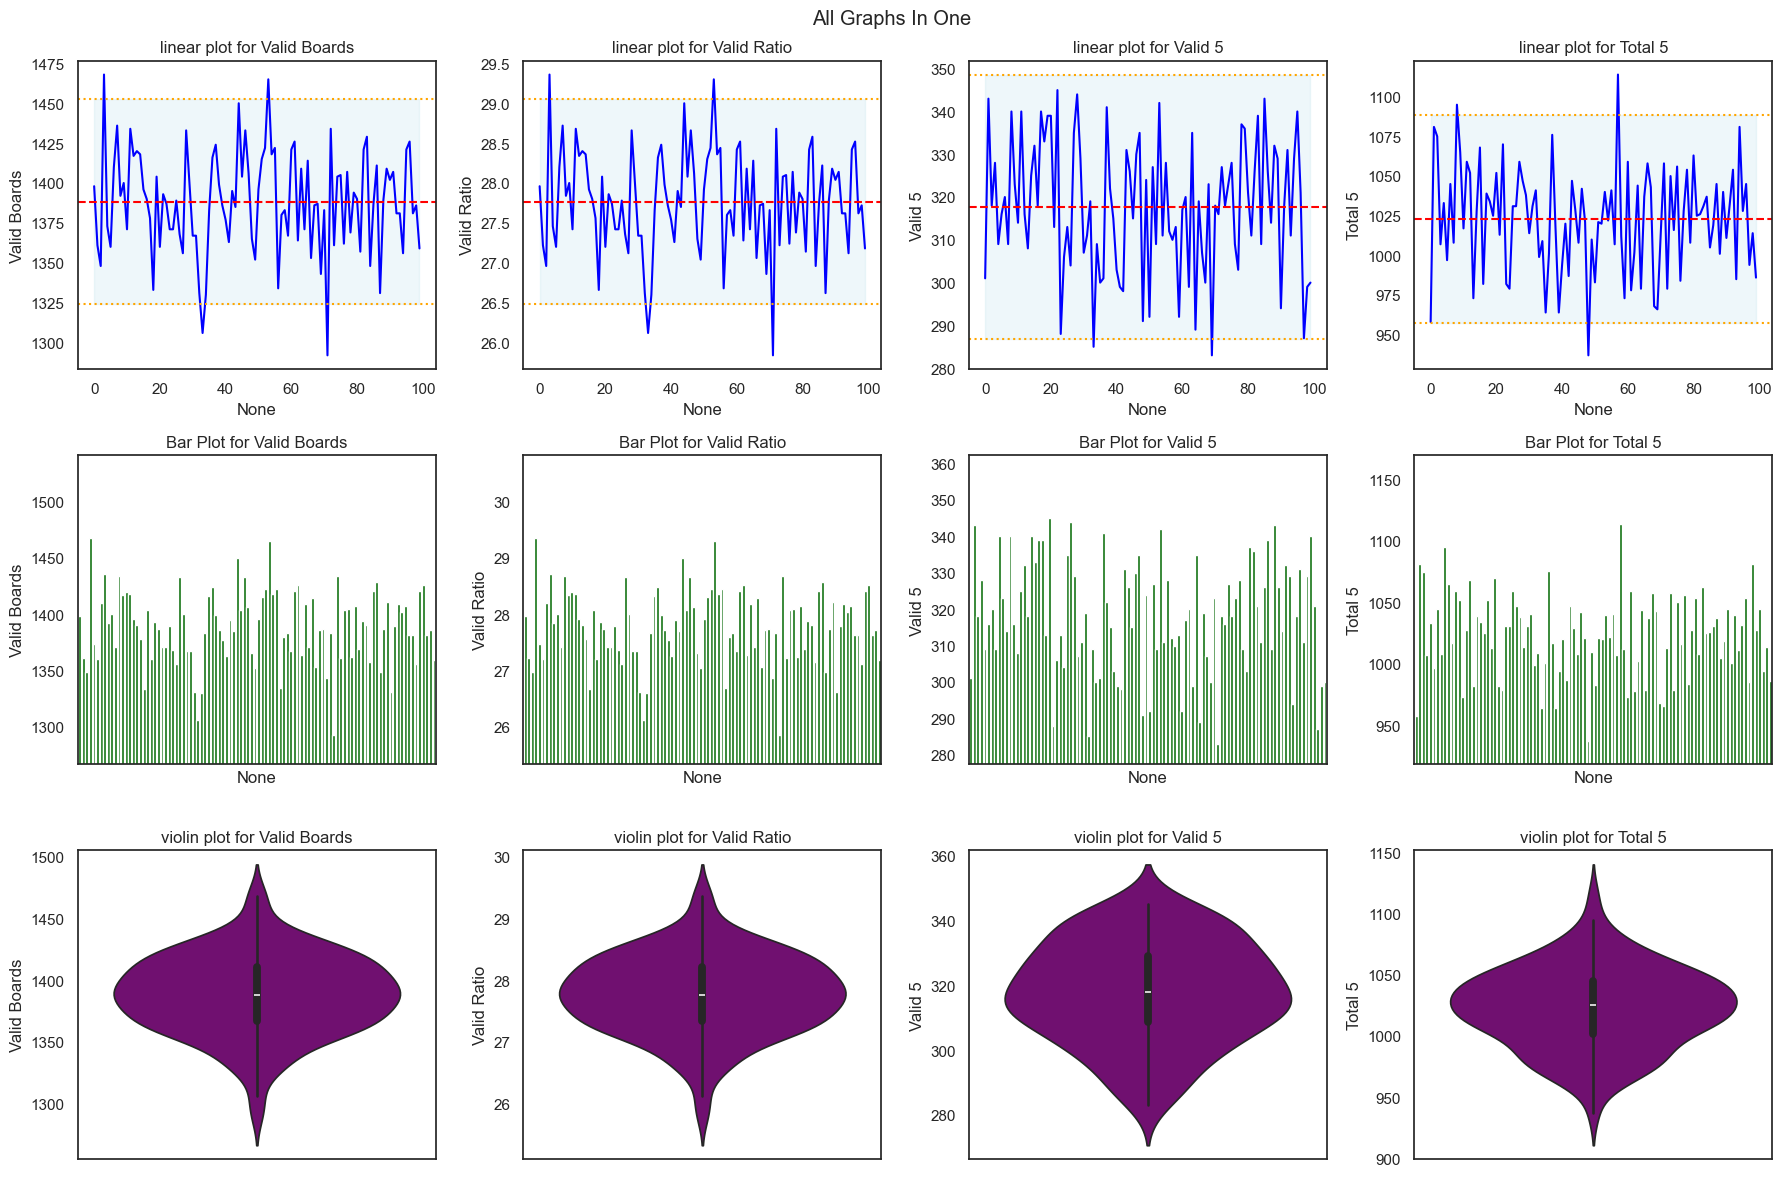

In [153]:
# Plot all graphs in one

sns.set(style="white") # set background for better view

# Create 3*4 sub plot
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('All Graphs In One',) # Set title

# Define list of graphs
plot_functions = [plot_line, plot_bar, plot_violin]

# Plot all graphs (Column by column)
for j, column in enumerate(df.columns): # for in columns
    for i, plot_func in enumerate(plot_functions): # for in plot ways
        ax = axes[i, j] # Set plot location (which cell?!)
        plot_func(ax, df, column) # Plot «columns[j]» with «plot_function[i]»

plt.tight_layout() # To prevent charts from getting mixed up
plt.savefig('all_graphs.png', dpi=300) # Save all graphs in one Picture
plt.show() # Show all graphs in one Picture

## Conclusion